In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
train_data = pd.read_excel('/Users/xinmengyuan/Downloads/drive-download-20230416T152006Z-001/Data_Train.xlsx')

In [3]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Date_of_Journey  10683 non-null  object
 2   Source           10683 non-null  object
 3   Destination      10683 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10683 non-null  object
 6   Arrival_Time     10683 non-null  object
 7   Duration         10683 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10683 non-null  object
 10  Price            10683 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 918.2+ KB


In [4]:
train_data.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              1
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        1
Additional_Info    0
Price              0
dtype: int64

In [5]:
train_data.shape

(10683, 11)

In [6]:
train_data[train_data['Total_Stops'].isnull()]

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
9039,Air India,6/05/2019,Delhi,Cochin,NaN,09:45,09:25 07 May,23h 40m,NaN,No info,7480


In [7]:
train_data.dropna(inplace=True)

In [8]:
train_data.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              0
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        0
Additional_Info    0
Price              0
dtype: int64

# pre-process&perform Featurization on "Date_of_Journey"

In [9]:
data = train_data.copy()

In [10]:
data.head(2)

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662


In [11]:
data.dtypes

Airline            object
Date_of_Journey    object
Source             object
Destination        object
Route              object
Dep_Time           object
Arrival_Time       object
Duration           object
Total_Stops        object
Additional_Info    object
Price               int64
dtype: object

In [12]:
def change_into_datetime(col):
    data[col] = pd.to_datetime(data[col])

In [13]:
data.columns

Index(['Airline', 'Date_of_Journey', 'Source', 'Destination', 'Route',
       'Dep_Time', 'Arrival_Time', 'Duration', 'Total_Stops',
       'Additional_Info', 'Price'],
      dtype='object')

In [14]:
for feature in ['Date_of_Journey','Dep_Time','Arrival_Time']:
    change_into_datetime(feature)

In [15]:
data.dtypes

Airline                    object
Date_of_Journey    datetime64[ns]
Source                     object
Destination                object
Route                      object
Dep_Time           datetime64[ns]
Arrival_Time       datetime64[ns]
Duration                   object
Total_Stops                object
Additional_Info            object
Price                       int64
dtype: object

In [16]:
data['Journey_day'] = data['Date_of_Journey'].dt.day

In [17]:
data['Journey_month'] = data['Date_of_Journey'].dt.month

In [18]:
data['Journey_year'] = data['Date_of_Journey'].dt.year

In [19]:
data.head(2)

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Journey_day,Journey_month,Journey_year
0,IndiGo,2019-03-24,Banglore,New Delhi,BLR → DEL,2023-04-30 22:20:00,2023-03-22 01:10:00,2h 50m,non-stop,No info,3897,24,3,2019
1,Air India,2019-01-05,Kolkata,Banglore,CCU → IXR → BBI → BLR,2023-04-30 05:50:00,2023-04-30 13:15:00,7h 25m,2 stops,No info,7662,5,1,2019


In [20]:
data.drop('Date_of_Journey',axis=1,inplace=True)

In [21]:
data.head(2)

,Airline,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Journey_day,Journey_month,Journey_year
0,IndiGo,Banglore,New Delhi,BLR → DEL,2023-04-30 22:20:00,2023-03-22 01:10:00,2h 50m,non-stop,No info,3897,24,3,2019
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,2023-04-30 05:50:00,2023-04-30 13:15:00,7h 25m,2 stops,No info,7662,5,1,2019


# Lets try to clean Dep_Time & Arrival_Time & featuriza it

In [22]:
def extract_hour_min(df,col):
    df[col+'_hour'] = df[col].dt.hour
    df[col+'_minute'] = df[col].dt.minute
    df.drop(col,axis=1,inplace=True)
    return df.head(2)

In [23]:
extract_hour_min(data,'Dep_Time')

,Airline,Source,Destination,Route,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Journey_day,Journey_month,Journey_year,Dep_Time_hour,Dep_Time_minute
0,IndiGo,Banglore,New Delhi,BLR → DEL,2023-03-22 01:10:00,2h 50m,non-stop,No info,3897,24,3,2019,22,20
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,2023-04-30 13:15:00,7h 25m,2 stops,No info,7662,5,1,2019,5,50


In [24]:
extract_hour_min(data,'Arrival_Time')

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Journey_day,Journey_month,Journey_year,Dep_Time_hour,Dep_Time_minute,Arrival_Time_hour,Arrival_Time_minute
0,IndiGo,Banglore,New Delhi,BLR → DEL,2h 50m,non-stop,No info,3897,24,3,2019,22,20,1,10
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2 stops,No info,7662,5,1,2019,5,50,13,15


# analysis when will most of the flight will take-off

In [25]:
def flight_dep_time(x):
    if(x>4) and (x<=8 ):
        return 'Early morning'
    elif (x>8) and (x<=12 ):
        return 'Morning'
    elif (x>12) and (x<=16 ):
        return 'Noon'
    elif (x>16) and (x<=20 ):
        return 'Evening'
    elif (x>20) and (x<=24 ):
        return 'Night'
    else:
        return 'Late Night'

<AxesSubplot:>

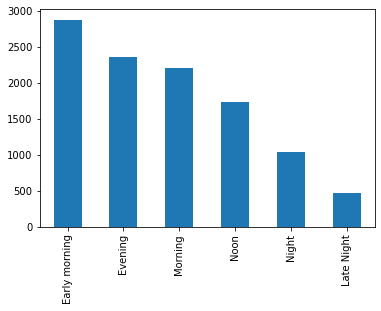

In [26]:
data['Dep_Time_hour'].apply(flight_dep_time).value_counts().plot(kind='bar')

In [27]:
!pip install plotly
!pip install cufflinks

You should consider upgrading via the '/Users/xinmengyuan/opt/anaconda3/bin/python -m pip install --upgrade pip' command.


You should consider upgrading via the '/Users/xinmengyuan/opt/anaconda3/bin/python -m pip install --upgrade pip' command.


In [28]:
import plotly
import cufflinks as cf
from cufflinks.offline import go_offline
from plotly.offline import download_plotlyjs,init_notebook_mode,plot,iplot

In [29]:
cf.go_offline()

In [30]:
data['Dep_Time_hour'].apply(flight_dep_time).value_counts().iplot(kind='bar')

# Pre-process Duration Feature&extract meaningful features from it

In [31]:
data.head(10)

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Journey_day,Journey_month,Journey_year,Dep_Time_hour,Dep_Time_minute,Arrival_Time_hour,Arrival_Time_minute
0,IndiGo,Banglore,New Delhi,BLR → DEL,2h 50m,non-stop,No info,3897,24,3,2019,22,20,1,10
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2 stops,No info,7662,5,1,2019,5,50,13,15
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,19h,2 stops,No info,13882,6,9,2019,9,25,4,25
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,5h 25m,1 stop,No info,6218,5,12,2019,18,5,23,30
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,4h 45m,1 stop,No info,13302,3,1,2019,16,50,21,35
5,SpiceJet,Kolkata,Banglore,CCU → BLR,2h 25m,non-stop,No info,3873,24,6,2019,9,0,11,25
6,Jet Airways,Banglore,New Delhi,BLR → BOM → DEL,15h 30m,1 stop,In-flight meal not included,11087,3,12,2019,18,55,10,25
7,Jet Airways,Banglore,New Delhi,BLR → BOM → DEL,21h 5m,1 stop,No info,22270,3,1,2019,8,0,5,5
8,Jet Airways,Banglore,New Delhi,BLR → BOM → DEL,25h 30m,1 stop,In-flight meal not included,11087,3,12,2019,8,55,10,25
9,Multiple carriers,Delhi,Cochin,DEL → BOM → COK,7h 50m,1 stop,No info,8625,27,5,2019,11,25,19,15


In [32]:
def preprocess_duration(x):
    if 'h' not in x:
        x = '0h ' + x
    elif 'm' not in x:
        x = x + ' 0m'
    return x

In [33]:
data['Duration'] = data['Duration'].apply(preprocess_duration)

In [34]:
data['Duration']

0        2h 50m
1        7h 25m
2        19h 0m
3        5h 25m
4        4h 45m
          ...  
10678    2h 30m
10679    2h 35m
10680     3h 0m
10681    2h 40m
10682    8h 20m
Name: Duration, Length: 10682, dtype: object

In [35]:
int(data['Duration'][0].split(' ')[0][0:-1])

2

In [36]:
int(data['Duration'][0].split(' ')[1][0:-1])

50

In [37]:
data['Duration_hours'] = data['Duration'].apply(lambda x:int(x.split(' ')[0][0:-1]))

In [38]:
data['Duration_mins'] = data['Duration'].apply(lambda x:int(x.split(' ')[1][0:-1]))

In [39]:
data.head(3)

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Journey_day,Journey_month,Journey_year,Dep_Time_hour,Dep_Time_minute,Arrival_Time_hour,Arrival_Time_minute,Duration_hours,Duration_mins
0,IndiGo,Banglore,New Delhi,BLR → DEL,2h 50m,non-stop,No info,3897,24,3,2019,22,20,1,10,2,50
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2 stops,No info,7662,5,1,2019,5,50,13,15,7,25
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,19h 0m,2 stops,No info,13882,6,9,2019,9,25,4,25,19,0


# analysis whether Duration impacts on Price or not

In [40]:
data['Duration_total_mins'] = data['Duration'].str.replace('h','*60').str.replace(' ','+').str.replace('m','*1').apply(eval)

In [41]:
data.head(2)

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Journey_day,Journey_month,Journey_year,Dep_Time_hour,Dep_Time_minute,Arrival_Time_hour,Arrival_Time_minute,Duration_hours,Duration_mins,Duration_total_mins
0,IndiGo,Banglore,New Delhi,BLR → DEL,2h 50m,non-stop,No info,3897,24,3,2019,22,20,1,10,2,50,170
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2 stops,No info,7662,5,1,2019,5,50,13,15,7,25,445


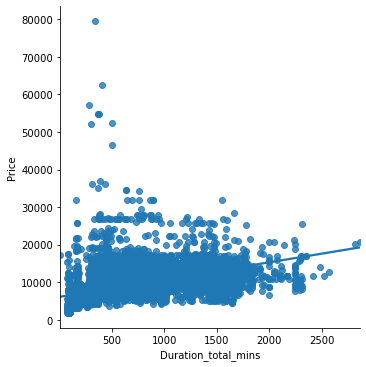

In [42]:
sns.lmplot(x='Duration_total_mins',y='Price',data=data)

# which city has maximum final destination of flights

In [43]:
data['Destination'].unique()

array(['New Delhi', 'Banglore', 'Cochin', 'Kolkata', 'Delhi', 'Hyderabad'],
      dtype=object)

<AxesSubplot:ylabel='Destination'>

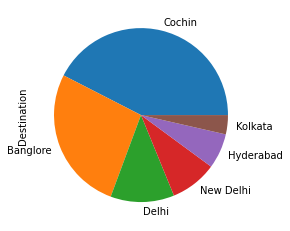

In [44]:
data['Destination'].value_counts().plot(kind='pie')

# on which route Jet Airways is extremely used

In [45]:
data['Route']

0                    BLR → DEL
1        CCU → IXR → BBI → BLR
2        DEL → LKO → BOM → COK
3              CCU → NAG → BLR
4              BLR → NAG → DEL
                 ...          
10678                CCU → BLR
10679                CCU → BLR
10680                BLR → DEL
10681                BLR → DEL
10682    DEL → GOI → BOM → COK
Name: Route, Length: 10682, dtype: object

In [46]:
data[data['Airline'] =='Jet Airways'].groupby('Route').size().sort_values(ascending=False)

Route
CCU → BOM → BLR          930
DEL → BOM → COK          875
BLR → BOM → DEL          385
BLR → DEL                382
CCU → DEL → BLR          300
BOM → HYD                207
DEL → JAI → BOM → COK    207
DEL → AMD → BOM → COK    141
DEL → IDR → BOM → COK     86
DEL → NAG → BOM → COK     61
DEL → ATQ → BOM → COK     38
DEL → COK                 34
DEL → BHO → BOM → COK     29
DEL → BDQ → BOM → COK     28
DEL → LKO → BOM → COK     25
DEL → JDH → BOM → COK     23
CCU → GAU → BLR           22
DEL → MAA → BOM → COK     16
DEL → IXC → BOM → COK     13
BLR → MAA → DEL           10
BLR → BDQ → DEL            8
DEL → UDR → BOM → COK      7
BOM → DEL → HYD            5
CCU → BOM → PNQ → BLR      4
BLR → BOM → JDH → DEL      3
DEL → DED → BOM → COK      2
BOM → BDQ → DEL → HYD      2
DEL → CCU → BOM → COK      1
BOM → VNS → DEL → HYD      1
BOM → UDR → DEL → HYD      1
BOM → JDH → DEL → HYD      1
BOM → IDR → DEL → HYD      1
BOM → DED → DEL → HYD      1
dtype: int64

# Airline vs Price analysis

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11]),
 [Text(0, 0, 'IndiGo'),
  Text(1, 0, 'Air India'),
  Text(2, 0, 'Jet Airways'),
  Text(3, 0, 'SpiceJet'),
  Text(4, 0, 'Multiple carriers'),
  Text(5, 0, 'GoAir'),
  Text(6, 0, 'Vistara'),
  Text(7, 0, 'Air Asia'),
  Text(8, 0, 'Vistara Premium economy'),
  Text(9, 0, 'Jet Airways Business'),
  Text(10, 0, 'Multiple carriers Premium economy'),
  Text(11, 0, 'Trujet')])

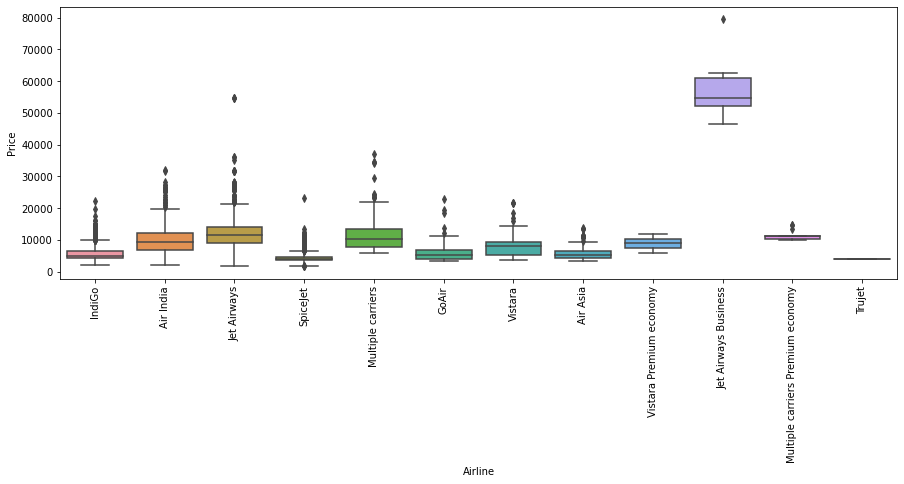

In [47]:
plt.figure(figsize=(15,5))
sns.boxplot(y='Price',x='Airline',data=data)
plt.xticks(rotation='vertical')

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11]),
 [Text(0, 0, 'IndiGo'),
  Text(1, 0, 'Air India'),
  Text(2, 0, 'Jet Airways'),
  Text(3, 0, 'SpiceJet'),
  Text(4, 0, 'Multiple carriers'),
  Text(5, 0, 'GoAir'),
  Text(6, 0, 'Vistara'),
  Text(7, 0, 'Air Asia'),
  Text(8, 0, 'Vistara Premium economy'),
  Text(9, 0, 'Jet Airways Business'),
  Text(10, 0, 'Multiple carriers Premium economy'),
  Text(11, 0, 'Trujet')])

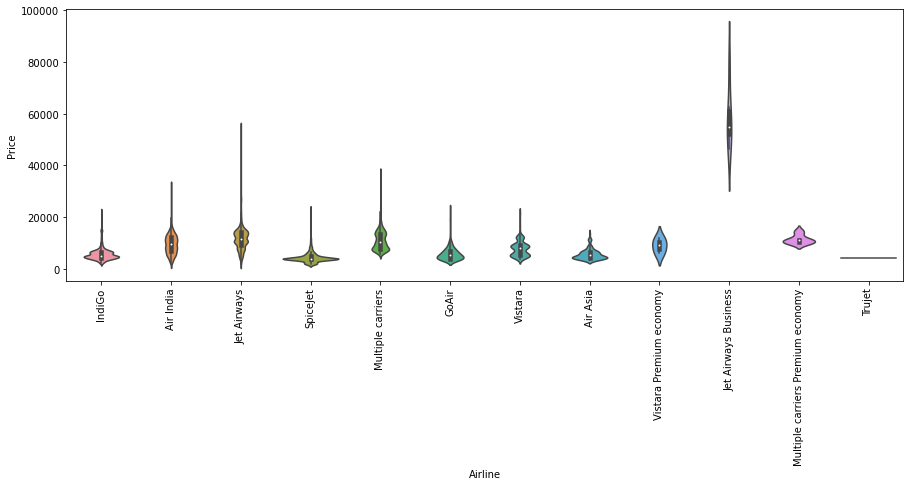

In [48]:
plt.figure(figsize=(15,5))
sns.violinplot(y='Price',x='Airline',data=data)
plt.xticks(rotation='vertical')

In [49]:
data.head(4)

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Journey_day,Journey_month,Journey_year,Dep_Time_hour,Dep_Time_minute,Arrival_Time_hour,Arrival_Time_minute,Duration_hours,Duration_mins,Duration_total_mins
0,IndiGo,Banglore,New Delhi,BLR → DEL,2h 50m,non-stop,No info,3897,24,3,2019,22,20,1,10,2,50,170
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2 stops,No info,7662,5,1,2019,5,50,13,15,7,25,445
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,19h 0m,2 stops,No info,13882,6,9,2019,9,25,4,25,19,0,1140
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,5h 25m,1 stop,No info,6218,5,12,2019,18,5,23,30,5,25,325


In [50]:
data['Additional_Info'].value_counts()

No info                         8344
In-flight meal not included     1982
No check-in baggage included     320
1 Long layover                    19
Change airports                    7
Business class                     4
No Info                            3
Red-eye flight                     1
1 Short layover                    1
2 Long layover                     1
Name: Additional_Info, dtype: int64

In [51]:
np.round(data['Additional_Info'].value_counts()/len(data)*100,2)

No info                         78.11
In-flight meal not included     18.55
No check-in baggage included     3.00
1 Long layover                   0.18
Change airports                  0.07
Business class                   0.04
No Info                          0.03
Red-eye flight                   0.01
1 Short layover                  0.01
2 Long layover                   0.01
Name: Additional_Info, dtype: float64

In [52]:
data.drop(columns=['Additional_Info','Route','Duration_total_mins','Journey_year'],axis=1,inplace=True)

In [53]:
data.head(4)

,Airline,Source,Destination,Duration,Total_Stops,Price,Journey_day,Journey_month,Dep_Time_hour,Dep_Time_minute,Arrival_Time_hour,Arrival_Time_minute,Duration_hours,Duration_mins
0,IndiGo,Banglore,New Delhi,2h 50m,non-stop,3897,24,3,22,20,1,10,2,50
1,Air India,Kolkata,Banglore,7h 25m,2 stops,7662,5,1,5,50,13,15,7,25
2,Jet Airways,Delhi,Cochin,19h 0m,2 stops,13882,6,9,9,25,4,25,19,0
3,IndiGo,Kolkata,Banglore,5h 25m,1 stop,6218,5,12,18,5,23,30,5,25


In [54]:
cat_col =  [col for col in data.columns if data[col].dtype=='object']

In [55]:
num_col =  [col for col in data.columns if data[col].dtype!='object']

In [56]:
data['Source'].unique()

array(['Banglore', 'Kolkata', 'Delhi', 'Chennai', 'Mumbai'], dtype=object)

In [57]:
data['Source'].apply(lambda x:1 if x=='Banglore' else 0)

0        1
1        0
2        0
3        0
4        1
        ..
10678    0
10679    0
10680    1
10681    1
10682    0
Name: Source, Length: 10682, dtype: int64

In [58]:
for category in data['Source'].unique():
    data['Source'+category] = data['Source'].apply(lambda x:1 if x==category else 0)

In [59]:
data.head(3)

,Airline,Source,Destination,Duration,Total_Stops,Price,Journey_day,Journey_month,Dep_Time_hour,Dep_Time_minute,Arrival_Time_hour,Arrival_Time_minute,Duration_hours,Duration_mins,SourceBanglore,SourceKolkata,SourceDelhi,SourceChennai,SourceMumbai
0,IndiGo,Banglore,New Delhi,2h 50m,non-stop,3897,24,3,22,20,1,10,2,50,1,0,0,0,0
1,Air India,Kolkata,Banglore,7h 25m,2 stops,7662,5,1,5,50,13,15,7,25,0,1,0,0,0
2,Jet Airways,Delhi,Cochin,19h 0m,2 stops,13882,6,9,9,25,4,25,19,0,0,0,1,0,0


# lets perform target guided encoding on Data

In [60]:
airlines = data.groupby(['Airline'])['Price'].mean().sort_values().index

In [61]:
airlines

Index(['Trujet', 'SpiceJet', 'Air Asia', 'IndiGo', 'GoAir', 'Vistara',
       'Vistara Premium economy', 'Air India', 'Multiple carriers',
       'Multiple carriers Premium economy', 'Jet Airways',
       'Jet Airways Business'],
      dtype='object', name='Airline')

In [62]:
dict1 = {key:index for index,key in enumerate(airlines,0)}

In [63]:
data['Airline'] = data['Airline'].map(dict1)

In [64]:
data['Airline']

0         3
1         7
2        10
3         3
4         3
         ..
10678     2
10679     7
10680    10
10681     5
10682     7
Name: Airline, Length: 10682, dtype: int64

In [65]:
data.head(2)

,Airline,Source,Destination,Duration,Total_Stops,Price,Journey_day,Journey_month,Dep_Time_hour,Dep_Time_minute,Arrival_Time_hour,Arrival_Time_minute,Duration_hours,Duration_mins,SourceBanglore,SourceKolkata,SourceDelhi,SourceChennai,SourceMumbai
0,3,Banglore,New Delhi,2h 50m,non-stop,3897,24,3,22,20,1,10,2,50,1,0,0,0,0
1,7,Kolkata,Banglore,7h 25m,2 stops,7662,5,1,5,50,13,15,7,25,0,1,0,0,0


In [66]:
data['Destination'].unique()

array(['New Delhi', 'Banglore', 'Cochin', 'Kolkata', 'Delhi', 'Hyderabad'],
      dtype=object)

In [67]:
data['Destination'].replace('New Delhi','Delhi',inplace=True)

In [68]:
dest = data.groupby(['Destination'])['Price'].mean().sort_values().index

In [69]:
dest

Index(['Kolkata', 'Hyderabad', 'Delhi', 'Banglore', 'Cochin'], dtype='object', name='Destination')

In [70]:
dict2 = {key:index for index,key in enumerate(dest,0)}

In [71]:
dict2

{'Kolkata': 0, 'Hyderabad': 1, 'Delhi': 2, 'Banglore': 3, 'Cochin': 4}

In [72]:
data['Destination'] = data['Destination'].map(dict2)

In [73]:
data.head(3)

,Airline,Source,Destination,Duration,Total_Stops,Price,Journey_day,Journey_month,Dep_Time_hour,Dep_Time_minute,Arrival_Time_hour,Arrival_Time_minute,Duration_hours,Duration_mins,SourceBanglore,SourceKolkata,SourceDelhi,SourceChennai,SourceMumbai
0,3,Banglore,2,2h 50m,non-stop,3897,24,3,22,20,1,10,2,50,1,0,0,0,0
1,7,Kolkata,3,7h 25m,2 stops,7662,5,1,5,50,13,15,7,25,0,1,0,0,0
2,10,Delhi,4,19h 0m,2 stops,13882,6,9,9,25,4,25,19,0,0,0,1,0,0


# Perform manual encoding on data

In [74]:
data['Total_Stops'].unique()

array(['non-stop', '2 stops', '1 stop', '3 stops', '4 stops'],
      dtype=object)

In [75]:
stops = {'non-stop':0, '2 stops':2, '1 stop':1, '3 stops':3, '4 stops':4}

In [76]:
data['Total_Stops'] = data['Total_Stops'].map(stops)

# perform outlier detection

In [77]:
def plot(df,col):
    fig,(ax1,ax2,ax3)=plt.subplots(3,1)
    sns.distplot(df[col],ax=ax1)
    sns.boxplot(df[col],ax=ax2)
    sns.distplot(df[col],ax=ax3,kde=False)

/Users/xinmengyuan/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).

/Users/xinmengyuan/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.

/Users/xinmengyuan/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms

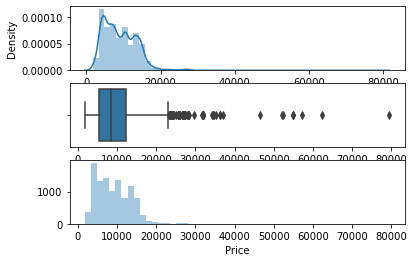

In [78]:
plot(data,'Price')

# how to deal with oulier

In [79]:
data['Price'] = np.where(data['Price']>=35000,data['Price'].median(),data['Price'])

/Users/xinmengyuan/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).

/Users/xinmengyuan/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.

/Users/xinmengyuan/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms

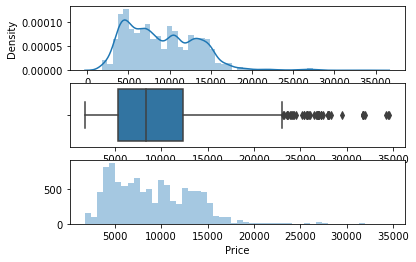

In [80]:
plot(data,'Price')

# perform feature selection

In [81]:
data.head(2)

,Airline,Source,Destination,Duration,Total_Stops,Price,Journey_day,Journey_month,Dep_Time_hour,Dep_Time_minute,Arrival_Time_hour,Arrival_Time_minute,Duration_hours,Duration_mins,SourceBanglore,SourceKolkata,SourceDelhi,SourceChennai,SourceMumbai
0,3,Banglore,2,2h 50m,0,3897.0,24,3,22,20,1,10,2,50,1,0,0,0,0
1,7,Kolkata,3,7h 25m,2,7662.0,5,1,5,50,13,15,7,25,0,1,0,0,0


In [82]:
data.drop(columns=['Source','Duration'],axis=1,inplace=True)

In [83]:
data.dtypes

Airline                  int64
Destination              int64
Total_Stops              int64
Price                  float64
Journey_day              int64
Journey_month            int64
Dep_Time_hour            int64
Dep_Time_minute          int64
Arrival_Time_hour        int64
Arrival_Time_minute      int64
Duration_hours           int64
Duration_mins            int64
SourceBanglore           int64
SourceKolkata            int64
SourceDelhi              int64
SourceChennai            int64
SourceMumbai             int64
dtype: object

In [84]:
from sklearn.feature_selection import mutual_info_regression

In [85]:
X = data.drop(['Price'],axis=1)

In [86]:
y = data['Price']

In [87]:
X.dtypes

Airline                int64
Destination            int64
Total_Stops            int64
Journey_day            int64
Journey_month          int64
Dep_Time_hour          int64
Dep_Time_minute        int64
Arrival_Time_hour      int64
Arrival_Time_minute    int64
Duration_hours         int64
Duration_mins          int64
SourceBanglore         int64
SourceKolkata          int64
SourceDelhi            int64
SourceChennai          int64
SourceMumbai           int64
dtype: object

In [88]:
imp = pd.DataFrame(mutual_info_regression(X,y),index=X.columns)
imp.columns=['Importance']

In [89]:
imp.sort_values(by='Importance',ascending=False)

,Importance
Destination,0.997610
Airline,0.971489
Total_Stops,0.784544
SourceDelhi,0.523517
SourceKolkata,0.467877
Duration_hours,0.466071
Arrival_Time_hour,0.395323
SourceBanglore,0.378424
Arrival_Time_minute,0.351490
Duration_mins,0.344615


# Build ML model

In [90]:
from sklearn.model_selection import train_test_split

In [91]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [92]:
from sklearn.ensemble import RandomForestRegressor

In [93]:
ml_model = RandomForestRegressor()

In [ ]:
model = ml_model.fit(X_train,y_train)

In [ ]:
X_test

In [103]:
y_pred = model.predict(X_test)

In [104]:
y_pred

array([16778.96,  6239.46,  8896.92, ...,  3564.88,  6221.7 ,  6923.9 ])

In [105]:
y_pred.shape

(2671,)

In [106]:
len(X_test)

2671

# Save model

In [107]:
!pip install pickle

ERROR: Could not find a version that satisfies the requirement pickle (from versions: none)
ERROR: No matching distribution found for pickle
You should consider upgrading via the '/Users/xinmengyuan/opt/anaconda3/bin/python -m pip install --upgrade pip' command.


In [108]:
import pickle

In [109]:
file = open(r'/Users/xinmengyuan/Downloads/drive-download-20230416T152006Z-001/rf_random.pkl','wb')

In [110]:
pickle.dump(model,file)

In [111]:
model = open(r'/Users/xinmengyuan/Downloads/drive-download-20230416T152006Z-001/rf_random.pkl','rb')

In [112]:
forest = pickle.load(model)

In [128]:
result = forest.predict(X_test)

In [129]:
result.shape

(2671,)

# define evaluation metric

In [114]:
def mape(y_true, y_pred):
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    
    return np.mean(np.abs((y_true-y_pred)/y_true))*100

In [115]:
mape(y_test, forest.predict(X_test))

13.21591134321983

# automate ml pipeline

In [116]:
def predict(ml_model):
    model = ml_model.fit(X_train, y_train)
    print('Training_score:{}'.format(model.score(X_train,y_train)))
    y_prediction = model.predict(X_test)
    print('Predictions are:{}'.format(y_prediction))
    print('\n')
    
    from sklearn import metrics
    re_score = metrics.r2_score(y_test,y_prediction)
    print('re_score:{}'.format(re_score))
    print('MSE: {}'.format(metrics.mean_squared_error(y_test,y_prediction)))
    print('MAE: {}'.format(metrics.mean_absolute_error(y_test,y_prediction)))
    print('RMSE: {}'.format(np.sqrt(metrics.mean_squared_error(y_test,y_prediction))))
    print('MMSE: {}'.format(mape(y_test,y_prediction)))
    sns.distplot(y_test-y_prediction)

Training_score:0.9517510383565592
Predictions are:[16724.08  6287.9   8926.67 ...  3535.87  6210.67  6941.94]


re_score:0.8036396621944478
MSE: 3822664.4465671163
MAE: 1187.4328018675549
RMSE: 1955.1635344817364
MMSE: 13.262352764670563


/Users/xinmengyuan/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



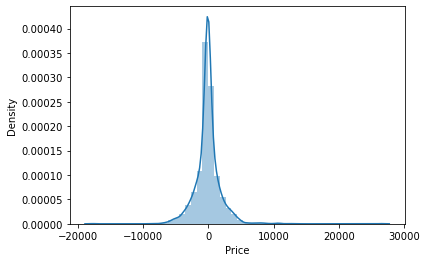

In [117]:
predict(RandomForestRegressor())